Available Modes: ['Subways', 'Buses', 'LIRR', 'MetroNorth', 'AccessARide', 'Bridges_Tunnels', 'StatenIsland']

========== FORECAST FOR Subways ==========


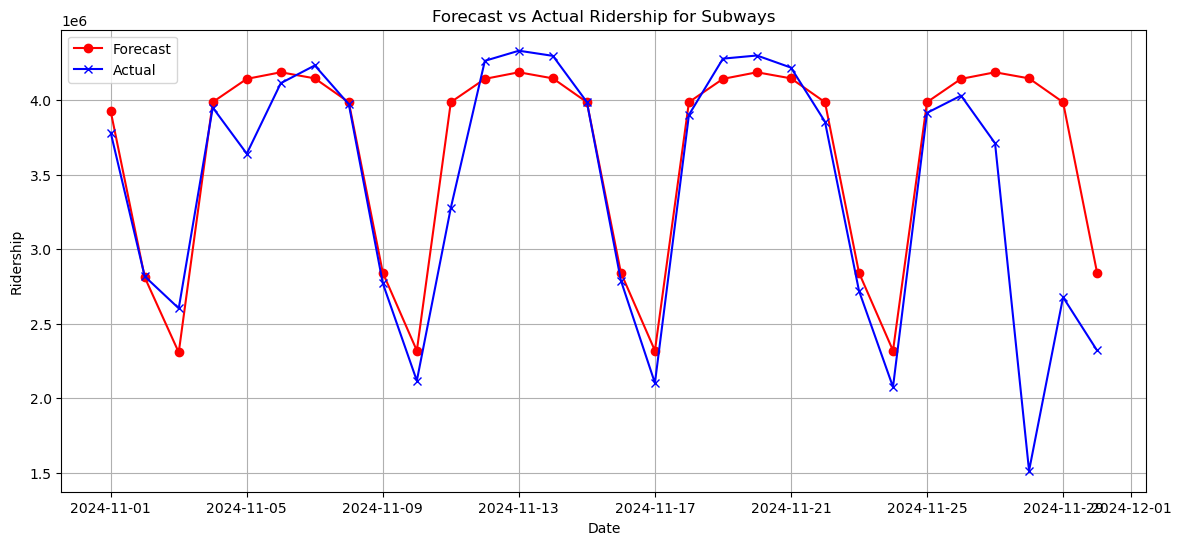

C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mode Subways 

Next_30_Days_Total 109149450 

Max_Day {'Date': Timestamp('2024-11-06 00:00:00'), 'Forecast_Ridership': 4186460} 

Min_Day {'Date': Timestamp('2024-11-03 00:00:00'), 'Forecast_Ridership': 2307191} 

Trend DOWNWARD 📉 

MAE 294974.43333333335 

RMSE 586536.893684532 


========== FORECAST FOR Buses ==========


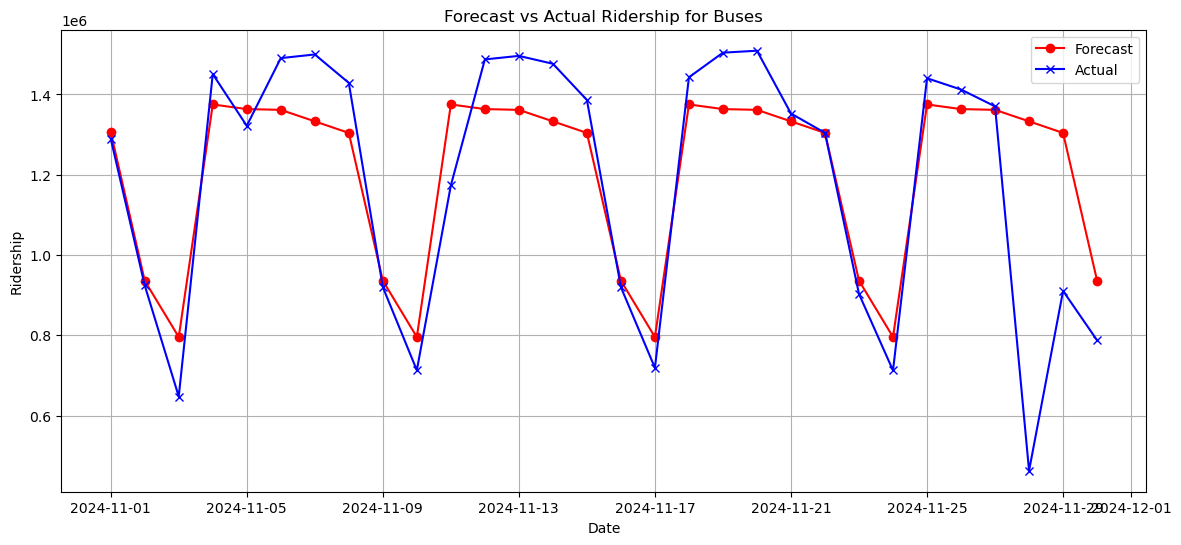

C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mode Buses 

Next_30_Days_Total 36121882 

Max_Day {'Date': Timestamp('2024-11-04 00:00:00'), 'Forecast_Ridership': 1375140} 

Min_Day {'Date': Timestamp('2024-11-03 00:00:00'), 'Forecast_Ridership': 795851} 

Trend DOWNWARD 📉 

MAE 120586.36666666667 

RMSE 199982.1657170959 


========== FORECAST FOR LIRR ==========


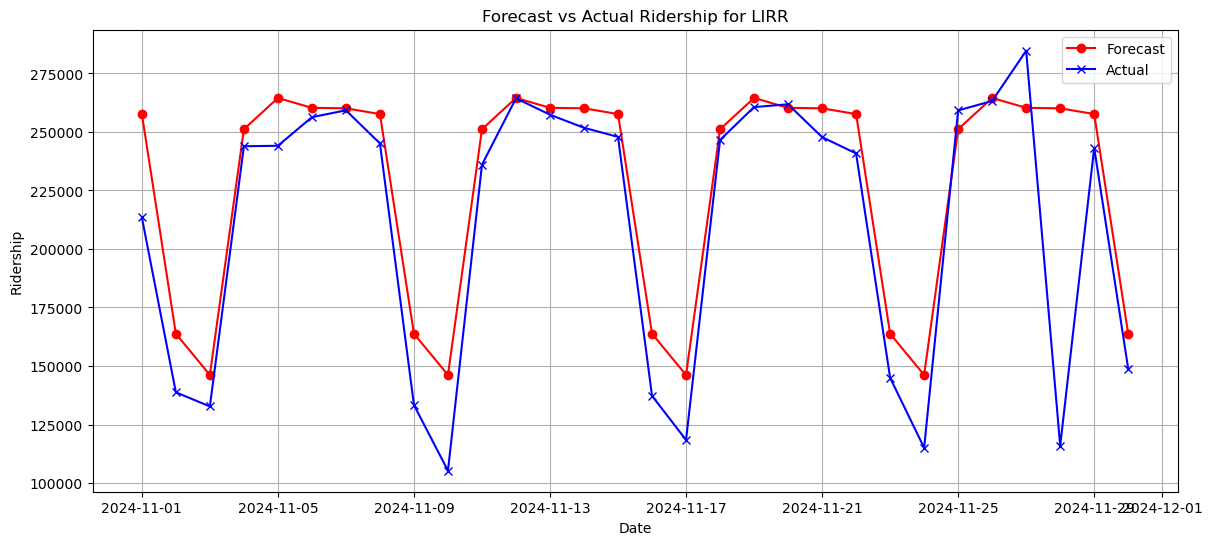

C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mode LIRR 

Next_30_Days_Total 6836034 

Max_Day {'Date': Timestamp('2024-11-05 00:00:00'), 'Forecast_Ridership': 264516} 

Min_Day {'Date': Timestamp('2024-11-03 00:00:00'), 'Forecast_Ridership': 146174} 

Trend DOWNWARD 📉 

MAE 19535.966666666667 

RMSE 32437.54389952071 


========== FORECAST FOR MetroNorth ==========


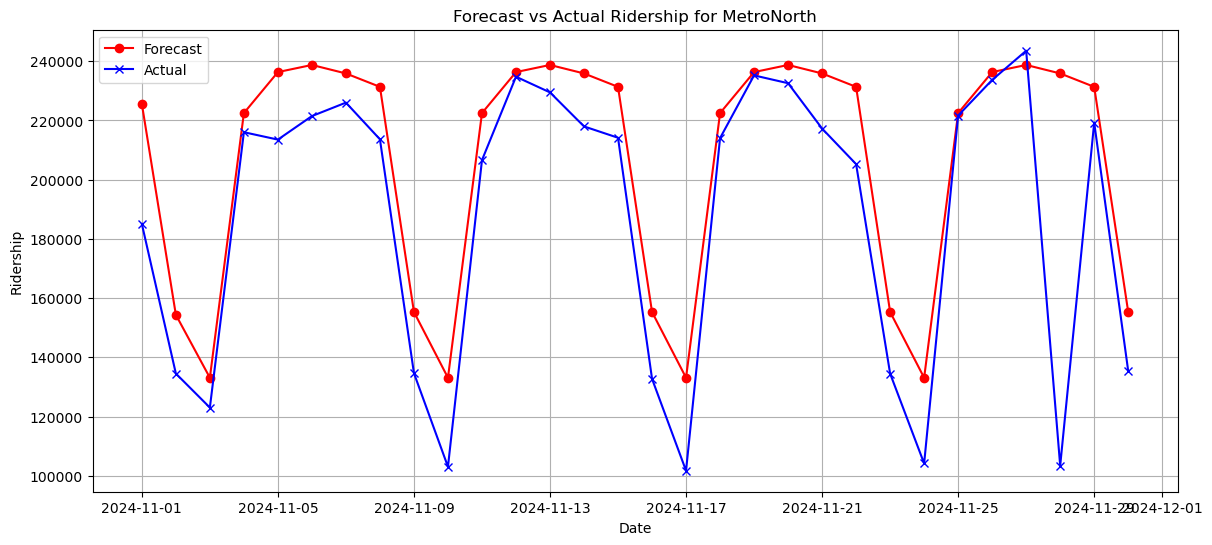

C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mode MetroNorth 

Next_30_Days_Total 6192370 

Max_Day {'Date': Timestamp('2024-11-06 00:00:00'), 'Forecast_Ridership': 238721} 

Min_Day {'Date': Timestamp('2024-11-03 00:00:00'), 'Forecast_Ridership': 133102} 

Trend DOWNWARD 📉 

MAE 19798.066666666666 

RMSE 30395.44138518143 


========== FORECAST FOR AccessARide ==========


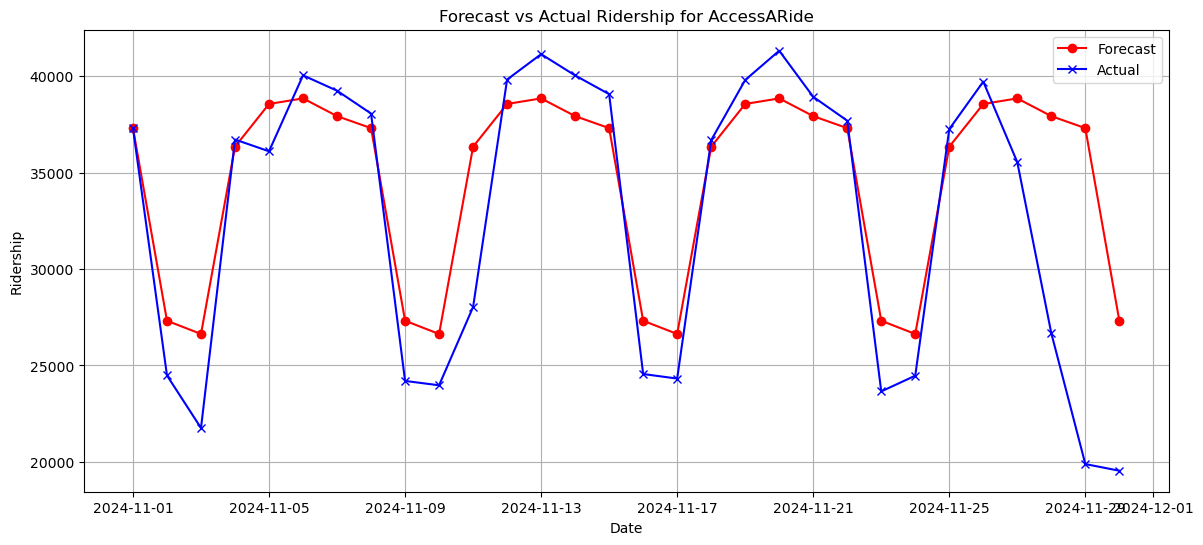

C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mode AccessARide 

Next_30_Days_Total 1036386 

Max_Day {'Date': Timestamp('2024-11-06 00:00:00'), 'Forecast_Ridership': 38849} 

Min_Day {'Date': Timestamp('2024-11-03 00:00:00'), 'Forecast_Ridership': 26633} 

Trend DOWNWARD 📉 

MAE 3117.1666666666665 

RMSE 4781.189325540944 


========== FORECAST FOR Bridges_Tunnels ==========


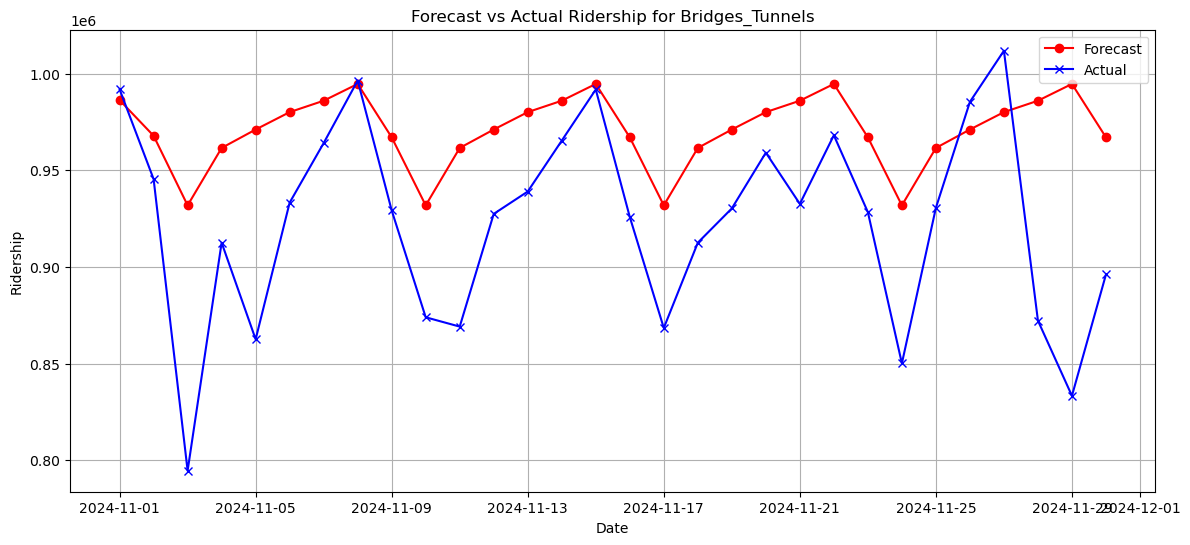

C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mode Bridges_Tunnels 

Next_30_Days_Total 29125313 

Max_Day {'Date': Timestamp('2024-11-08 00:00:00'), 'Forecast_Ridership': 994756} 

Min_Day {'Date': Timestamp('2024-11-03 00:00:00'), 'Forecast_Ridership': 931883} 

Trend DOWNWARD 📉 

MAE 50994.86666666667 

RMSE 63753.059772322566 


========== FORECAST FOR StatenIsland ==========


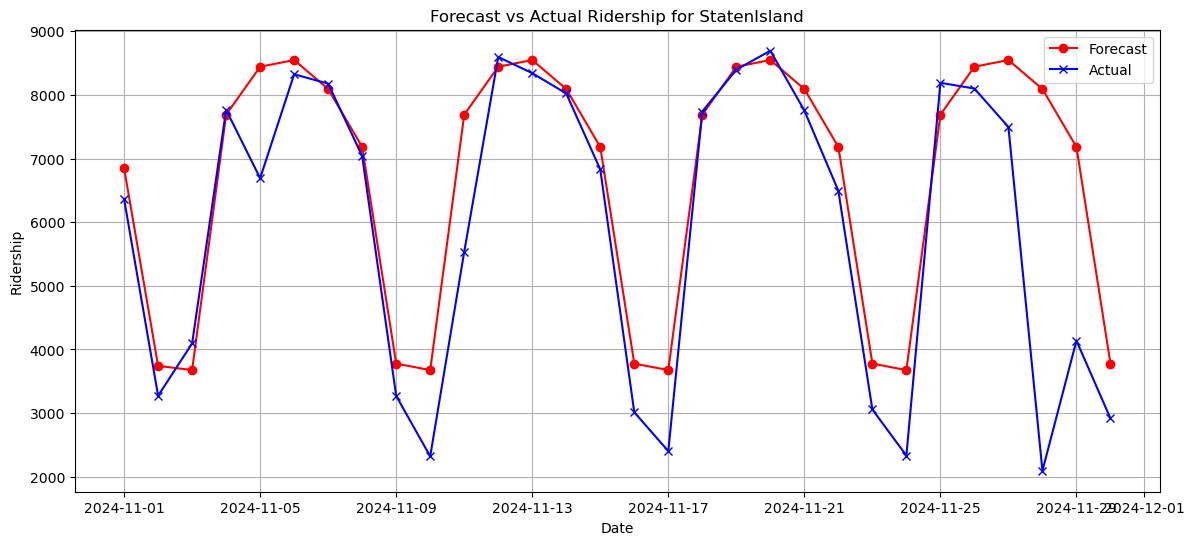

Mode StatenIsland 

Next_30_Days_Total 200220 

Max_Day {'Date': Timestamp('2024-11-06 00:00:00'), 'Forecast_Ridership': 8548} 

Min_Day {'Date': Timestamp('2024-11-03 00:00:00'), 'Forecast_Ridership': 3676} 

Trend DOWNWARD 📉 

MAE 854.1 

RMSE 1452.620402353393 



C:\Users\mosta\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# =========================
# 1) LOAD DATA
# =========================
df = df = pd.read_excel("C:\\Users\\mosta\\Downloads\\Fact Ridership long (1).xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2022-11-24']
modes = df['Mode'].unique().tolist()
print("Available Modes:", modes)

# Load actual ridership for comparison
actual_df = pd.read_excel("C:\\Users\\mosta\\Downloads\\MTA_REAL_RIDERSHIP_FORCAST.xlsx")
actual_df['Date'] = pd.to_datetime(actual_df['Date'])

# =========================
# OPTIONAL: HOLIDAY LIST
# =========================
holiday_list = ["11/24/2022","12/26/2022","1/1/2023","1/2/2023","1/16/2023","2/12/2023","2/13/2023",  "2/20/2023","5/29/2023", "6/19/2023","7/4/2023", "9/4/2023", "10/9/2023","11/7/2023", "11/10/2023", "11/11/2023", "11/23/2023","12/25/2023", "1/1/2024", "1/15/2024","2/12/2024", "2/19/2024", "5/27/2024", "6/19/2024","7/4/2024", "9/2/2024", "10/14/2024"]
holiday_types = {

    "2022-11-24": "Thanksgiving",
    "2023-11-23": "Thanksgiving",

}
holiday_list = pd.to_datetime(holiday_list)

# =========================
# FEATURE ENGINEERING
# =========================
def add_features(df):
    df = df.sort_values("Date").copy()
    # Time features
    df["Month"] = df["Date"].dt.month
    df["DayOfWeek"] = df["Date"].dt.dayofweek
    df["IsWeekend"] = df["DayOfWeek"].isin([5,6]).astype(int)
    df["Holiday"] = df["Date"].isin(holiday_list).astype(int)
    df["HolidayType"] = df["Date"].map(holiday_types).fillna("None")
    df["HolidayType"] = df["HolidayType"].astype("category").cat.codes
    # Lag features
    df["Lag1"] = df["Ridership"].shift(1)
    df["Lag7"] = df["Ridership"].shift(7)
    df["Lag30"] = df["Ridership"].shift(30)
    # Rolling averages
    df["MA7"] = df["Ridership"].rolling(7).mean()
    df["MA30"] = df["Ridership"].rolling(30).mean()
    df["DaysSinceStart"] = (df["Date"] - df["Date"].min()).dt.days
    df = df.dropna()
    return df

# =========================
# XGBOOST FORECASTING
# =========================
def forecast_mode_xgb(df_mode, actual_mode_df, days=30):
    df_feat = add_features(df_mode)
    FEATURES = ["Month","DayOfWeek","IsWeekend","Holiday","Lag1","Lag7","Lag30","MA7","MA30","DaysSinceStart","HolidayType"]
    X = df_feat[FEATURES]
    y = df_feat["Ridership"]

    # Train XGBoost
    model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror'
    )
    model.fit(X, y)

    # Recursive Forecasting
    last_date = df_feat["Date"].max()
    last_row = df_feat.iloc[-1].copy()
    forecasts = []
    future_dates = []

    for i in range(1, days+1):
        next_date = last_date + pd.Timedelta(days=i)
        future_dates.append(next_date)

        # Lag values
        last_row["Lag30"] = last_row.get("Lag29", np.nan)
        last_row["Lag7"] = last_row.get("Lag6", np.nan)
        last_row["Lag1"] = last_row.get("Forecast", last_row["Ridership"])

        # Time features
        last_row["Month"] = next_date.month
        last_row["DayOfWeek"] = next_date.weekday()
        last_row["IsWeekend"] = int(next_date.weekday() in [5,6])
        last_row["Holiday"] = int(next_date in holiday_list)
        last_row["DaysSinceStart"] += 1

        # Approximate rolling averages
        last_row["MA7"] = np.mean([last_row["Lag1"], last_row["Lag7"]])
        last_row["MA30"] = np.mean([last_row["Lag1"], last_row["Lag30"]])

        # Predict
        f = model.predict(last_row[FEATURES].values.reshape(1,-1))[0]
        last_row["Forecast"] = f
        forecasts.append(int(f))

    # Forecast dataframe
    forecast_df = pd.DataFrame({
        "Date": future_dates,
        "Forecast_Ridership": forecasts
    })

    # =========================
    # PLOTTING FORECAST VS ACTUAL
    # =========================
    # Align actual with forecast
    actual_period = actual_mode_df[actual_mode_df['Date'].isin(forecast_df['Date'])]

    plt.figure(figsize=(14,6))
    plt.plot(forecast_df['Date'], forecast_df['Forecast_Ridership'],
             label='Forecast', color='red', marker='o')
    plt.plot(actual_period['Date'], actual_period['Ridership'],
             label='Actual', color='blue', marker='x')
    plt.title(f'Forecast vs Actual Ridership for {df_mode["Mode"].iloc[0]}')
    plt.xlabel('Date')
    plt.ylabel('Ridership')
    plt.legend()
    plt.grid(True)
    plt.show()

    # =========================
    # ERROR METRICS
    # =========================
    mae = mean_absolute_error(actual_period['Ridership'], forecast_df['Forecast_Ridership'])
    rmse = mean_squared_error(actual_period['Ridership'], forecast_df['Forecast_Ridership'], squared=False)

    # Insights
    insights = {
        "Mode": df_mode["Mode"].iloc[0],
        "Next_30_Days_Total": int(sum(forecasts)),
        "Max_Day": forecast_df.loc[forecast_df["Forecast_Ridership"].idxmax()].to_dict(),
        "Min_Day": forecast_df.loc[forecast_df["Forecast_Ridership"].idxmin()].to_dict(),
        "Trend": "UPWARD 📈" if forecasts[-1] > forecasts[0] else "DOWNWARD 📉",
        "MAE": mae,
        "RMSE": rmse
    }

    return insights, forecast_df

# =========================
# RUN FORECAST FOR ALL MODES
# =========================
all_insights = {}
all_forecasts = []

for m in modes:
    print(f"\n========== FORECAST FOR {m} ==========")
    mode_df = df[df["Mode"] == m]
    actual_mode_df = actual_df[actual_df["Mode"] == m]

    insights, forecast_df = forecast_mode_xgb(mode_df, actual_mode_df, days=30)
    forecast_df["Mode"] = m

    all_insights[m] = insights
    all_forecasts.append(forecast_df)

    for k,v in insights.items():
        print(k, v, '\n')

# =========================
# FINAL OUTPUT
# =========================
final_forecast_raw = pd.concat(all_forecasts, ignore_index=True)
#final_forecast_raw.to_csv("All_Modes_Forecast_Raw_XGBoost.csv", index=False)

